## Analysis of Yelp Business Intelligence Data 


We will analyze a subset of Yelp's business, reviews and user data. This dataset is from Kaggle which was uploaded into AWS S3 bucket.

In [1]:
%%info


## Installation and Initial Setup

Install pandas, matplotlib, seaborn

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1619202776002_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/46/231de802ade4225b76b96cffe419cf3ce52bbe92e3b092cf12db7d11c207/kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl

  Usi

## Importing

Now, importing the installed packages from the previous block below.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

Using spark we are loading the data from S3 into a dataframe object that we can manipulate further down in our analys. First we will upload the business dataset.

In [4]:
df = spark.read.json('s3://project2yelp/project2/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
 print('Data frame type: ' + str(type(df)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>

## Overview of Data

Display the number of rows and columns in our dataset.

In [6]:
print(f'Total Columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count():,}')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 160,585

Display the DataFrame schema below.

In [7]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:
* business_id
* name
* city
* state
* categories

In [8]:
df.select('business_id','name','city','state','categories').show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+--------------------+
|         business_id|                name|       city|state|          categories|
+--------------------+--------------------+-----------+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+--------------------+
only showing top 5 rows

## Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:
- How many businesses are categorized as Active Life, for instance
- What are the top 20 most popular categories available

We will use an **Association Table** to break multiple categories into separate rows.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [9]:
df.select('business_id','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|6iYb2HFDywm3zjuRg...|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|Gyms, Active Life...|
+--------------------+--------------------+
only showing top 5 rows

In [10]:
from pyspark.sql.functions import explode, split
business_by_categories = df.withColumn("categories", explode(split('categories', ", ")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [11]:
business_by_categories.select('business_id', "categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|  categories|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [12]:
unique_categories = business_by_categories.select('business_id', "categories")
unique_categories.select("categories").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1330

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

In [13]:
business_by_categories.groupby("categories").count().show(20)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|      Dermatologists|  351|
|      Paddleboarding|   67|
|        Aerial Tours|    8|
|         Hobby Shops|  610|
|          Bubble Tea|  779|
|             Embassy|    9|
|             Tanning|  701|
|            Handyman|  507|
|      Aerial Fitness|   13|
|             Falafel|  141|
|        Summer Camps|  308|
|       Outlet Stores|  184|
|     Clothing Rental|   37|
|      Sporting Goods| 1864|
|     Cooking Schools|  114|
|  College Counseling|   20|
|  Lactation Services|   47|
|Ski & Snowboard S...|   55|
|             Museums|  336|
|              Doulas|   52|
+--------------------+-----+
only showing top 20 rows

## Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

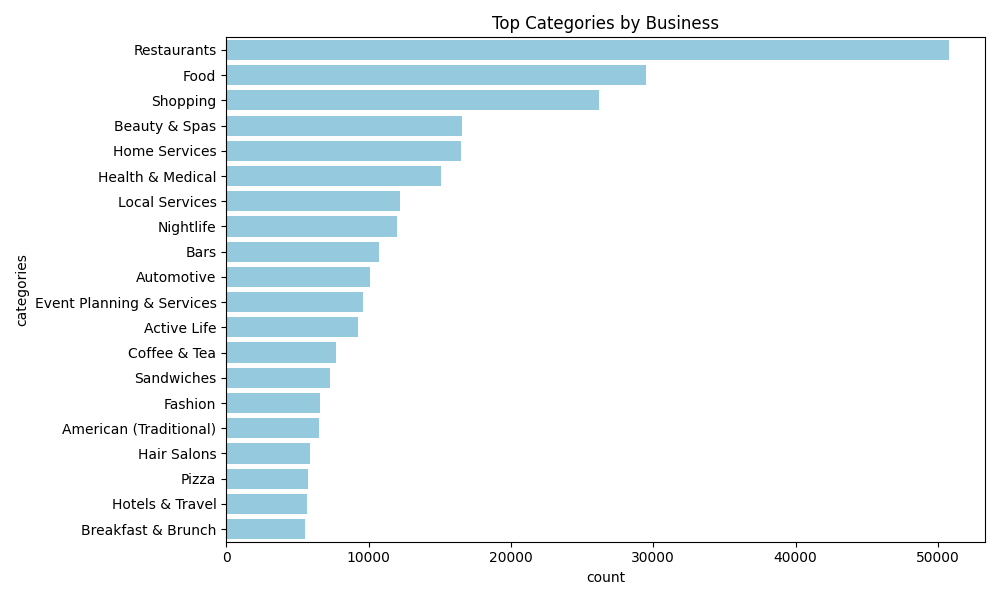

In [14]:
top_categories = business_by_categories.groupby("categories").count().orderBy("count", ascending=False).limit(20)

pdf = top_categories.toPandas()

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'count', y = 'categories', data = pdf, ax = ax, color = 'skyblue')
ax.set_title('Top Categories by Business')
plt.tight_layout()
%matplot plt

## Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [15]:
df2 = spark.read.json('s3://project2yelp/project2/yelp_academic_dataset_review.json')
df2.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the business_id and stars columns together for the user reviews data.

In [16]:
business_by_rating = df2.select('business_id', "stars")
business_by_rating.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who **took the time to submit a written review**.

In [17]:
from pyspark.sql.functions import avg
business_by_avg_rating = df2.groupby("business_id").avg("stars")
business_by_avg_rating.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|uEUweopM30lHcVxjO...|              3.0|
|wdBrDCbZopowEkIEX...|4.538461538461538|
|L3WCfeVozu5etMhz4...|              4.2|
|bOnsvrz1VkbrZM1jV...|              3.8|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
+--------------------+-----------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by business_id.

In [18]:
frame1 = business_by_avg_rating.select('business_id','avg(stars)')
frame2 = df.select('business_id','stars','name','city','state') 
joined_frames = frame1.join(frame2, frame1.business_id == frame2.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [19]:
joined_frames = joined_frames.select('avg(stars)','stars','name','city','state') 
joined_frames.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+----------+-----+
|        avg(stars)|stars|                name|      city|state|
+------------------+-----+--------------------+----------+-----+
|               5.0|  5.0|    CheraBella Salon|   Peabody|   MA|
|             3.875|  4.0|Mezcal Cantina & ...|  Columbus|   OH|
|3.8666666666666667|  4.0|    Red Table Coffee|    Austin|   TX|
|               5.0|  5.0|          WonderWell|    Austin|   TX|
|             3.375|  3.5|         Avalon Oaks|Wilmington|   MA|
+------------------+-----+--------------------+----------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the skew (for lack of a better word) between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review and reviewers who just provided a star rating).

The formula you can use is something like:
(row['avg(stars)'] - row['stars']) / row['stars']

If the skew is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If skew is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [20]:
skew = joined_frames.select('avg(stars)','stars').toPandas()
skew["skew"] = (skew['avg(stars)'] - skew['stars']) / skew['stars']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

And finally, graph it!

In [21]:
plt.figure(figsize=(10,5)) 
sns.distplot(skew["skew"], kde=True) 
plt.title('Skew of Reviews', size = 15) 
plt.axis((-0.6, 1.30, 0, 11))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(-0.6, 1.3, 0.0, 11.0)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

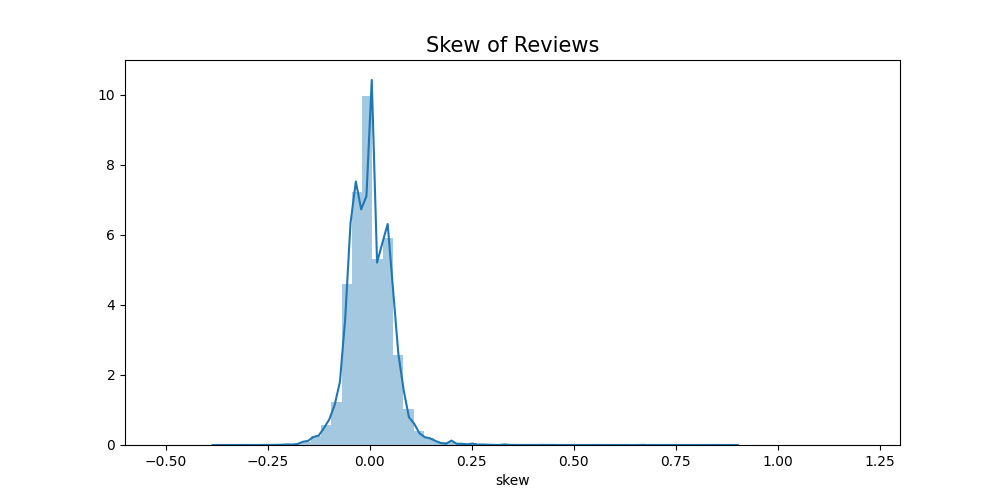

In [22]:
%matplot plt


So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph.

#### Answer: The Yelp (written) Reviews skew positive by looking at the graph. The result indicated that people who left a written review were more satisfied than normal. However to be precise we could calculate the skewness coefficient. 

In [23]:
mean = skew['skew'].mean().round(5)
median = skew['skew'].median().round(5) 
standard_dev = skew['skew'].std().round(5) 
skew_rev = (3 * (mean-median) / standard_dev).round(5)
print('Mean: ', mean)
print('Median: ', median) 
print('Standard Deviation: ', standard_dev) 
print('Skew: ', skew_rev)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Mean:  0.00114
Median:  0.0
Standard Deviation:  0.05142
Skew:  0.06651

## Should the Elite be Trusted? (Or, some other analysis of your choice)

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The ONLY requirement is that you must use the Users dataset and join on either the business* or **reviews dataset

* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

## Loading Data

In [24]:
df3 = spark.read.json('s3://project2yelp/project2/yelp_academic_dataset_user.json')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview Data

In [25]:
print(f'Total Columns: {len(df3.dtypes)}') 
print(f'Total Rows: {df3.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 22
Total Rows: 2,189,457

Let's select the user_id, elite and average_stars columns and display 5 rows.

In [26]:
df3.select('user_id','elite', 'average_stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+
|             user_id|               elite|average_stars|
+--------------------+--------------------+-------------+
|q_QQ5kBBwlCcbL1s4...|2006,2007,2008,20...|         3.85|
|dIIKEfOgo0KqUfGQv...|2007,2008,2009,20...|         4.09|
|D6ErcUnFALnCQN4b1...|           2010,2011|         3.76|
|JnPIjvC0cmooNDfsa...|2009,2010,2011,20...|         3.77|
|37Hc8hr3cw0iHLoPz...|      2009,2010,2011|         3.72|
+--------------------+--------------------+-------------+
only showing top 5 rows

Next the goal is to combine the review dataset (df2) and the user dataset (df3) on user_id column so that way we could have a table for elite's review.

In [27]:
user_elite = df3.filter(df3['elite'] != '').select('user_id', 'elite', 'average_stars')
review = df2.select('business_id', 'stars', 'user_id')
user_elite_review = user_elite.join(review, user_elite.user_id == review.user_id).drop(df2['user_id']) 
user_elite_review.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+--------------------+-----+
|             user_id|               elite|average_stars|         business_id|stars|
+--------------------+--------------------+-------------+--------------------+-----+
|0JQYSCWOQWKqK7KMj...| 2015,2016,2017,2018|         3.83|eCLuYcTuQpDPFOezh...|  4.0|
|l91pXxTZGS5CNWjNB...|2012,2013,2014,20...|         3.53|RP_U_TyolABy3eYuR...|  3.0|
|WAyYDJKFMzlTTnKxq...|2011,2012,2013,20...|         3.65|_6TF9YiOiYSToPBRz...|  5.0|
|g34Qcj06LmCDhKzks...|2017,2018,2019,20,20|         3.99|bxy3khT-2R66tcdKj...|  4.0|
|_UMIAnpnXWAqXS4y6...|2015,2016,2017,20...|         4.37|A0F6H8OO3qYAvI2L3...|  4.0|
+--------------------+--------------------+-------------+--------------------+-----+
only showing top 5 rows

Now we need to join our table of user_elite_review with the business_by_avg_rating dataset on business_id column to calculate the skewness of reviews made by elite users.

In [28]:
skew2 = user_elite_review.join(business_by_avg_rating, business_by_avg_rating.business_id == user_elite_review.business_id).drop(user_elite_review["business_id"])
skew2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+-----+--------------------+------------------+
|             user_id|               elite|average_stars|stars|         business_id|        avg(stars)|
+--------------------+--------------------+-------------+-----+--------------------+------------------+
|olrx_XfiOSiALGqmB...|      2016,2017,2018|          3.9|  5.0|--JuLhLvq3gyjNnXT...|               5.0|
|jWi0LzO0jRpr6TMwo...|2016,2017,2018,20...|         4.14|  5.0|--JuLhLvq3gyjNnXT...|               5.0|
|wEp-ZgJ6XpETVo1rs...|     2018,2019,20,20|         4.34|  5.0|--_nBudPOb1lNRgKf...|             3.875|
|VatcQtdb5tlz4D-N6...|2014,2015,2016,20...|         4.11|  4.0|--_nBudPOb1lNRgKf...|             3.875|
|8XlB-J73QOFV91Y0e...|2009,2010,2011,20...|         4.48|  4.0|--kyOk0waSrCDlbSv...|3.8666666666666667|
+--------------------+--------------------+-------------+-----+--------------------+------------------+
only showing top 5 rows

Using the same formula we used before (row['avg(stars)'] - row['stars']) / row['stars']

In [29]:
skew2 = skew2.toPandas()
skew2['skew'] = (skew2['stars'] - skew2['avg(stars)']) / skew2['avg(stars)']


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Finally let's graph it !

In [30]:
plt.figure(figsize=(10,5)) 
sns.distplot(skew2["skew"], kde=True) 
plt.title('Skew of Elite Reviews', size = 15) 
plt.axis((-0.6, 1.30, 0, 11))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(-0.6, 1.3, 0.0, 11.0)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

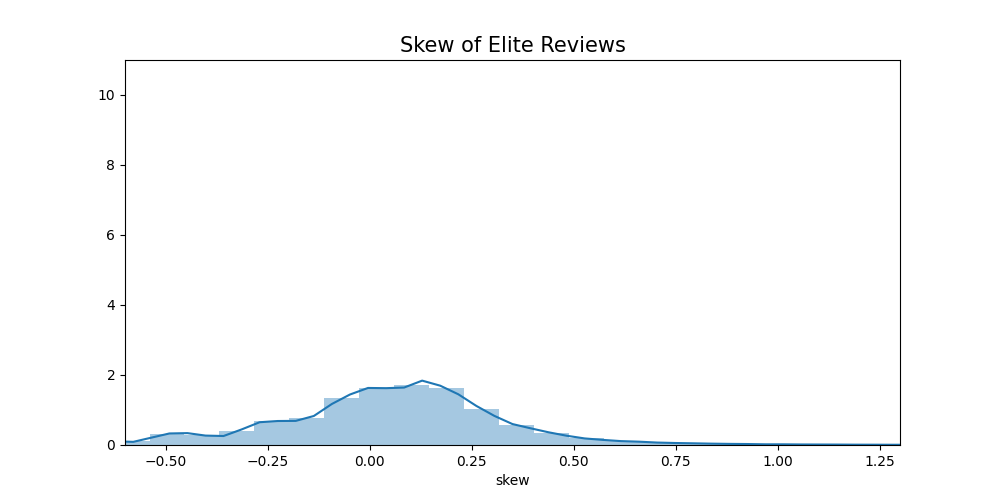

In [31]:
%matplot plt

I can't make a determination if we have a positive or negative skew. Let's get calculate the skew coefficient.

In [32]:
mean2 = skew2['skew'].mean().round(5)
median2 = skew2['skew'].median().round(5) 
standard_dev2 = skew2['skew'].std().round(5) 
skew_rev2 = (3 * (mean2-median2) / standard_dev2).round(5)
print('Mean: ', mean2)
print('Median: ', median2) 
print('Standard Deviation: ', standard_dev2) 
print('Skew: ', skew_rev2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Mean:  0.04206
Median:  0.06113
Standard Deviation:  0.29817
Skew:  -0.19187

#### The result above shows a negative skew of elite's review. This means that elite users'reviews indicate they were less satisfied than regular reviewers. The skew however is relatively low and closer to zero. I wouldn't strongly trust their reviews.